In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('satgpa.csv')
df.insert(loc=0, column='ones', value=1) #Agregamos la columna de unos
df.drop(['sat_v', 'sat_m'], axis=1, inplace=True)
df.head()
# Dejamos solo las columnas de interés que son: sexo, total de percentil de SAT verbal y matemática, y el promedio GPA en highschool

,ones,sex,sat_sum,hs_gpa,fy_gpa
0,1,1,127,3.40,3.18
1,1,2,122,4.00,3.33
2,1,2,116,3.75,3.25
3,1,1,95,3.75,2.42
4,1,1,107,4.00,2.63


In [3]:
y_column = df.pop('fy_gpa').to_numpy().reshape(1000,1)
x_columns = df.to_numpy()

In [4]:
x_columns

array([[  1.  ,   1.  , 127.  ,   3.4 ],
       [  1.  ,   2.  , 122.  ,   4.  ],
       [  1.  ,   2.  , 116.  ,   3.75],
       ...,
       [  1.  ,   1.  , 114.  ,   3.5 ],
       [  1.  ,   1.  , 120.  ,   2.3 ],
       [  1.  ,   1.  ,  93.  ,   2.7 ]])

In [5]:
m, n = x_columns.shape

In [6]:
x_columns.shape

(1000, 4)

In [7]:
random_theta = np.random.rand(n,1)
random_theta

array([[0.02685085],
       [0.3729332 ],
       [0.094567  ],
       [0.95625173]])

In [21]:
def linear_function_cost(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def linear_gradient_cost(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def gradient_descent_cost(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0001, threshold= 0.1, max_iter=1000):
    theta = theta_0
    iteration = 0
    costs = []

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
    return theta, costs

In [50]:
theta_results1, costs1 = gradient_descent_cost(x_columns, y_column, random_theta, linear_function_cost, linear_gradient_cost)
theta_results1

array([[ 0.02170996],
       [ 0.35507675],
       [-0.00999877],
       [ 0.93595395]])

In [51]:
min(costs1)

0.2467664952431457

In [52]:
x_row = np.arange(0,1000,1)

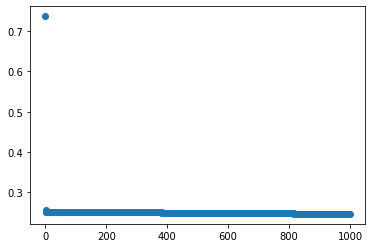

In [53]:
plt.scatter(x_row, costs1)
plt.show()

In [76]:
theta_results2, costs2 = gradient_descent_cost(x_columns, y_column, random_theta, linear_function_cost, linear_gradient_cost, threshold = 2, learning_rate=0.000001)
theta_results2

array([[ 0.02582763],
       [ 0.37136538],
       [-0.01060455],
       [ 0.95292404]])

In [82]:
min(costs2)

0.25268602234170057

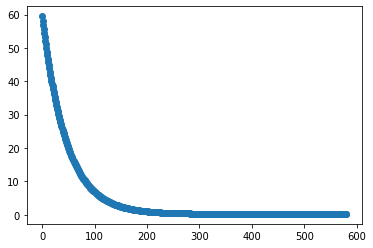

In [81]:
x_row = np.arange(0,len(costs2),1)
plt.scatter(x_row, costs2)
plt.show()

In [85]:
theta_results3, costs3 = gradient_descent_cost(x_columns, y_column, random_theta, linear_function_grades, linear_gradient_grades, threshold=5, learning_rate=0.000001)
theta_results3

array([[ 0.02583376],
       [ 0.37138329],
       [-0.01033134],
       [ 0.95294706]])

In [86]:
min(costs3)

0.2536422356270544

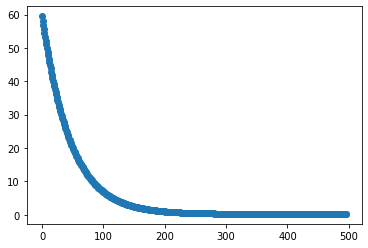

In [87]:
x_row = np.arange(0,len(costs3),1)
plt.scatter(x_row, costs3)
plt.show()